<a href="https://colab.research.google.com/github/Kamal-Moha/Stroke_Prediction/blob/main/Cleaning_the_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
path = '/content/drive/MyDrive/CODING DOJO DS BOOTCAMP/PROJECTS/PROJECT 2/Stroke Prediction Dataset/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


I will drop the id column as its not significant on whether a patient is likely to get a stroke or not

In [3]:
# dropping the id column
df = df.drop(columns='id')

In [4]:
# checking for duplicates
df.duplicated().sum()

0

In [5]:
# check for missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We see all the missing values are in the `bmi` column

**Handling missing values**

I will fill missing bmi with the median bmi of the gender assigned to that row

In [6]:
# grouping the data by gender and finding the median bmi of each gender
median_bmi = df.groupby('gender')['bmi'].transform('median')

# fill missing bmi with the median bmi of the gender type assinged to that row
df['bmi'] = df['bmi'].fillna(median_bmi)


In [7]:
# checking missing values again
df.isna().sum().sum()

0

**Correcting Categorical values**

In [8]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

I have looked at all categorical columns and it has 
the right consistent data.

**Some Graphs**

Text(0.5, 1.0, 'A Histogram showing the count of the different genders in our data')

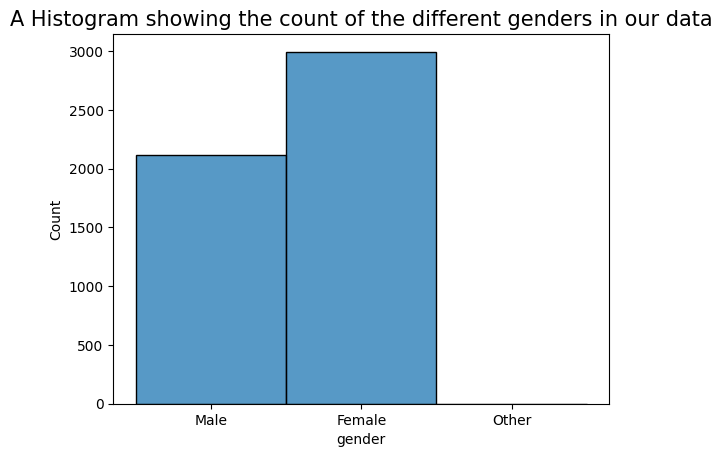

In [9]:
# creating a histplot 
sns.histplot(data=df, x='gender')
# creating the title
plt.title('A Histogram showing the count of the different genders in our data', fontsize=15)

We can see from this graph that there are more Female than Male in our data

Text(0.5, 1.0, 'A Heatmap showing the correlation of different features in our data')

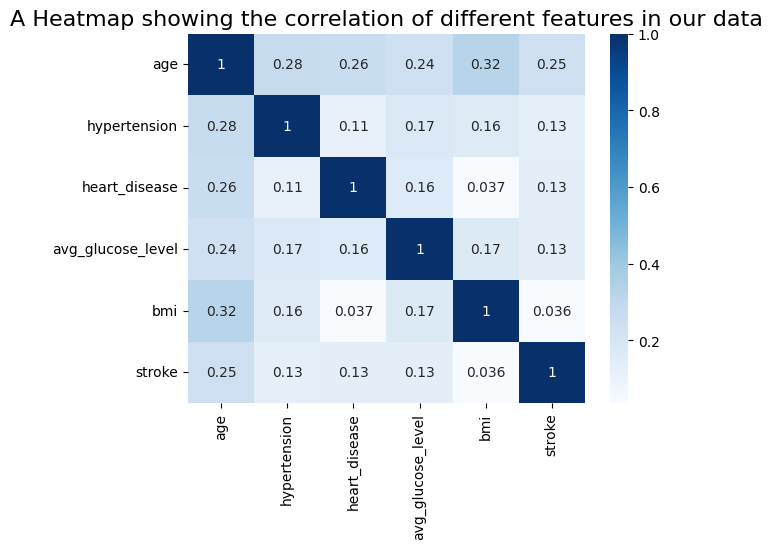

In [10]:
# creating a heatmap of our data
sns.heatmap(df.corr(), annot=True, cmap='Blues')

# creating a title
plt.title('A Heatmap showing the correlation of different features in our data', fontsize=16)

[Text(0, 0, 'age'),
 Text(1, 0, 'hypertension'),
 Text(2, 0, 'heart_disease'),
 Text(3, 0, 'avg_glucose_level'),
 Text(4, 0, 'bmi'),
 Text(5, 0, 'stroke')]

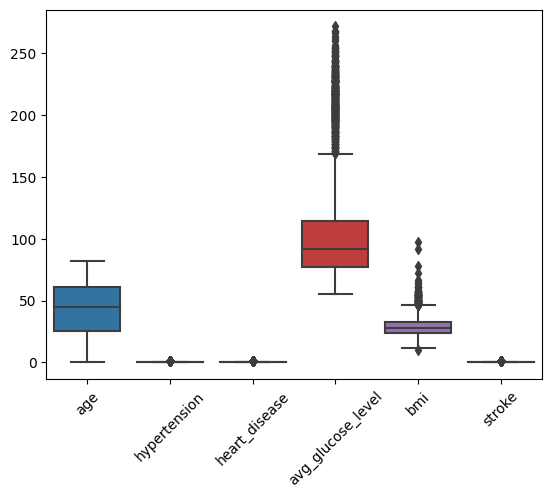

In [11]:
# Identifying Outliers in the data

# making the boxplot
ax = sns.boxplot(data=df)

# rotating the x-axis by 45
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

We can see there are very many high outliers in the `avg_glucose_level` and `bmi` columns.

**More Exploratory Data Analysis**

In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.8,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Text(0.5, 1.0, 'A lineplot showing the effect of heart disease on stroke')

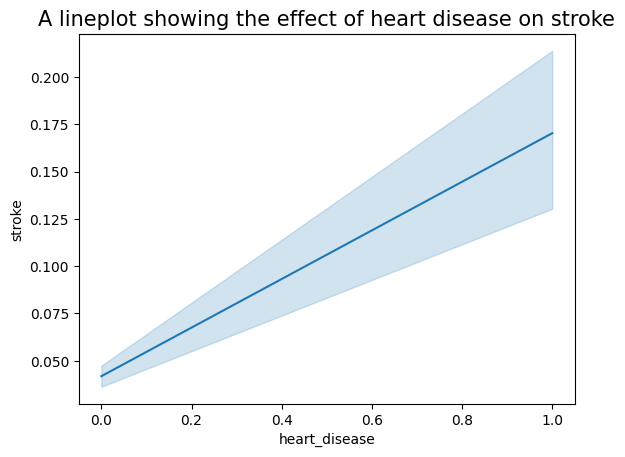

In [73]:
# creating the plot
sns.lineplot(data=df, x='heart_disease', y='stroke')
# providing title
plt.title('A lineplot showing the effect of heart disease on stroke', fontsize=15)

We see from this plot that having heart disease increase the chances of having stroke.

But let's explore to see if that's true. Let's show the percentage of people with stroke and also heart disease

In [81]:

# creating a df of people with stroke
have_stroke = df[df['stroke'] == 1]
# showing the percentage of people with stroke and heart disease
percent = len(have_stroke[have_stroke['heart_disease'] == 1])/len(have_stroke)*100
print(f'{round(percent)}%')


19%


We see that 19% of the people with stroke also have heart disease. 

This shows that having heart disease slightly increases your chances of having stroke, but it's hard to make significant conclusions with a 19% effect.

Text(0.5, 1.0, 'A Histogram showing the count of genders for people with stroke')

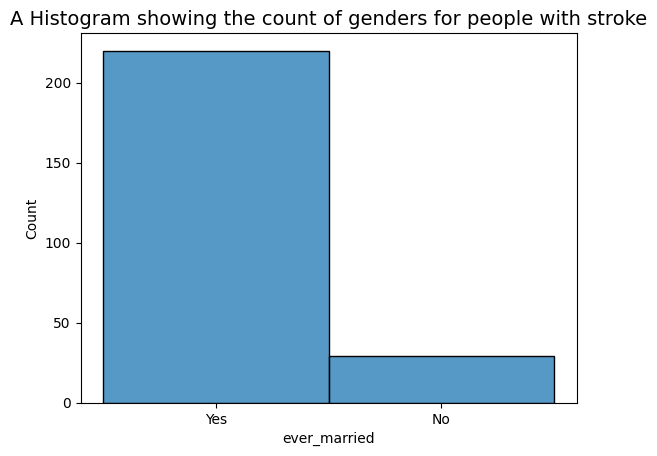

In [84]:
# creating the plot
sns.histplot(df[df['stroke'] == 1]['ever_married'])
# providing a title
plt.title('A Histogram showing the count of genders for people with stroke', fontsize=14)

We see that married people **significantly** experience stroke more than unmarried people

Text(0.5, 1.0, 'A Histogram showing the Residence Type people with stroke live in')

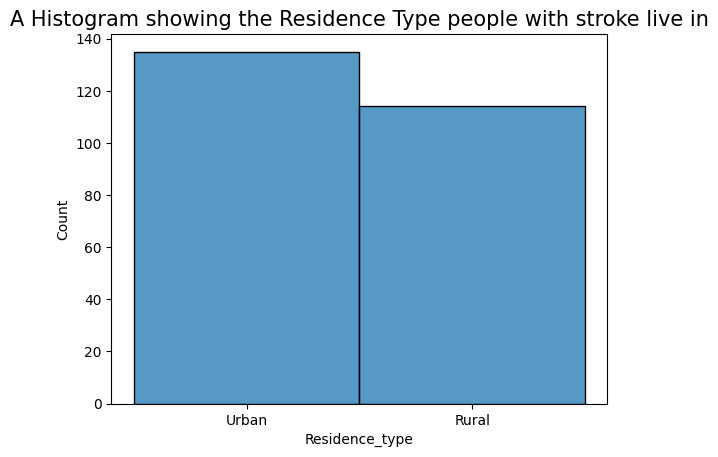

In [24]:
# creating plot
sns.histplot(df[df['stroke'] == 1]['Residence_type'])
# providing title
plt.title('A Histogram showing the Residence Type people with stroke live in', fontsize=15)

We can see from this Histogram that people who live in Urban areas experience **Stroke** more than people who live in Rural areas.

Text(0.5, 1.0, 'A lineplot showing the Relationship between Age and bmi')

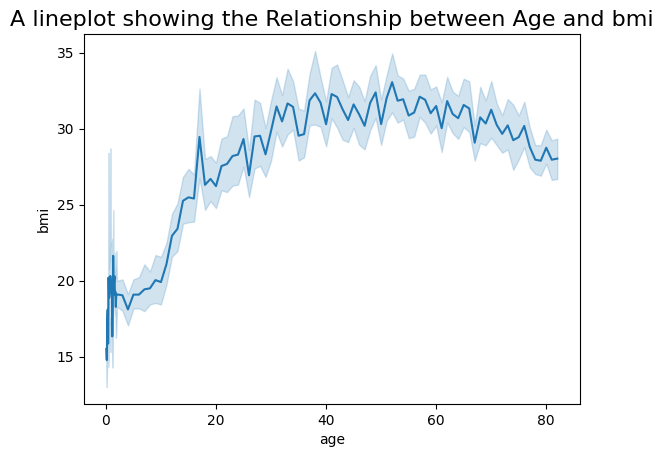

In [13]:
# creating the lineplot
sns.lineplot(data=df, x='age', y='bmi')
# providing a title to our plot
plt.title('A lineplot showing the Relationship between Age and bmi', fontsize=16)

We see from the above plot that bmi generally increases with increase in Age until a certain age whereby increase in age leads to a decrease in bmi

Text(0.5, 1.0, 'A lineplot showing the Relationship between Age and hypertension')

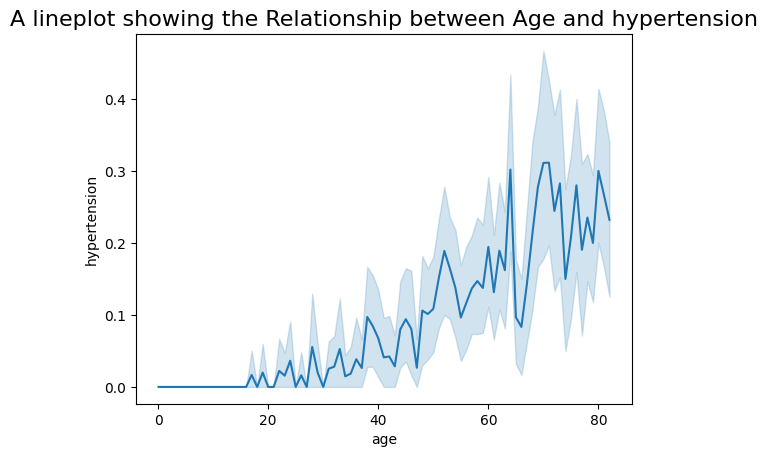

In [14]:
sns.lineplot(data=df, x='age', y='hypertension')
plt.title('A lineplot showing the Relationship between Age and hypertension', fontsize=16)


This plot shows that increase in age gently increases hypertension. This simply means that as someone grows older his/her hypertension levels tend to increase

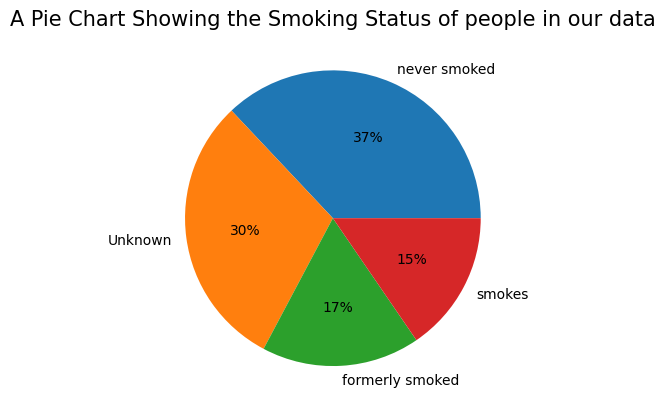

In [34]:
lst1 = df['smoking_status'].value_counts().values
lst2 = df['smoking_status'].value_counts().index
plt.pie(lst1, labels=lst2, autopct='%1.0f%%');
plt.title('A Pie Chart Showing the Smoking Status of people in our data', fontsize=15);

Let's further how smoking has impact on stroke

In [68]:
smokes_df = df[(df['smoking_status'] == 'smokes') | (df['smoking_status'] == 'formerly smoked')]

value = (len(smokes_df[df['stroke'] == 1])/len(smokes_df))*100
print(f'{round(value, 1)}%')

6.7%


<ipython-input-68-5a7d5d3d7878>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



We see that only 6.7% of the people who have stroke actually smoke or have smoked before. 

So from this, we see that smoking doesn't have any much impact on stroke